In [1]:
# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.display import HTML
from task1_environment.environment.main import PacMan
from task1_environment.policy.baseline import blinky_policy

# Environment Design

## maze
1. block   --> black
2. agent   --> pink
3. dot     --> purple
4. enemies --> bright yellow and yellow
5. path    --> orange (will once any dot has been collected)

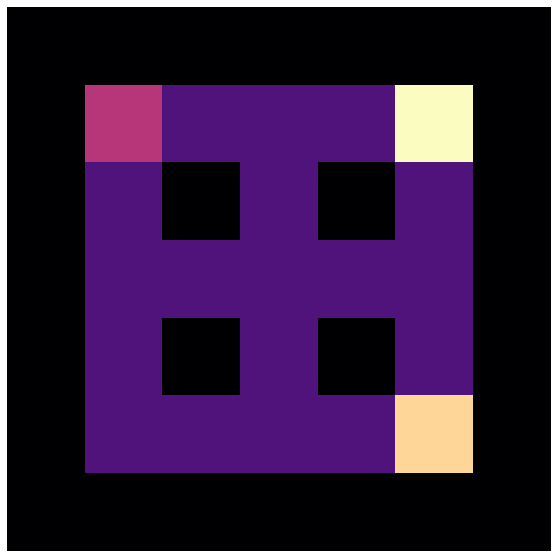

In [2]:
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
game.graphic.frame_figure

shape and size are configurable

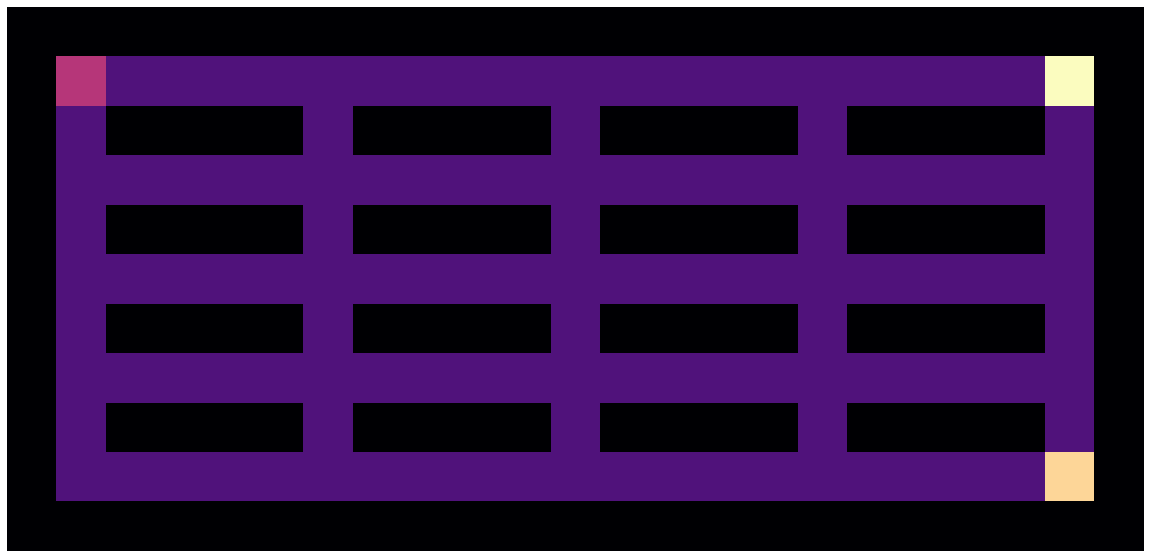

In [3]:
game = PacMan(maze_row_num=4, maze_column_num=4, maze_row_height=2, maze_column_width=5)
game.graphic.frame_figure

## Interaction with the game

### Common usages:
```Python

# initiate game
game = PacMan(maze_row_num=4, maze_column_num=4, maze_row_height=5, maze_column_width=2)

# get maze array
array = game.synthetic_array

# get records
reward = game.process.current_reward
rewards = game.process.reward
time = game.process.time
...

# configure setting
game.setting.maximum_time = 300
game.setting.reward_dict = {...}
```

### Advanced configuration
```python
# get state
state = game.state()

# customise state method
from type import MethodType
def state_func(game):
    # get maze array and process it
    array = game.synthetic_array
    state = ...
    return state
game.state = MethodType(state_func, game)

# cutomise policy
import functools
def my_policy(game, model, q_table, ...)
    ...
    return action
# pass all policy arguments to partial
p = functools.partial(my_policy, game=..., model=..., q_table=...)
game.agent.policy = p

# Give one of the enemy (blinky) smart rule-based policy
game.blinky.policy = blinky_policy
```

### Runing game
```python

# run game without updating graph to save time
game.run_one_step_without_graph()

# run game with action
game.run_one_step_without_graph(instruction=action)

# auto matically run game
while not game.process.termination:
    game.run_one_step_without_gragh()
    
# automatically run one game until it terminates and generate animation in Jupyter notebook
game.generate_animation()
HTML(game.animation.to_jshtml())

# reset game to its initial state without random agent, enemies positions (without being in the same cell)
game.random_reset
```

Please see below how the game will automatically run under rule based policies.

In [4]:
game = PacMan(maze_row_num=3, maze_column_num=3, maze_row_height=2, maze_column_width=2)
game.setting.maximum_time = 200 # Agent may not be able to win under 200 steps.
game.blinky.policy = blinky_policy
game.generate_animation()
HTML(game.animation.to_jshtml())

Generated frames: 13

In [5]:
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
game.setting.maximum_time = 200 # Agent may not be able to win under 200 steps.
game.blinky.policy = blinky_policy
game.generate_animation()
HTML(game.animation.to_jshtml())

Generated frames: 35

In [7]:
from task2_qlearning_tiancheng_wang.eval import check_win_rate

In [20]:
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
# game.blinky.policy = blinky_policy
win = 0
for i in range(1000):
    game.random_reset()
    while not game.process.termination:
        # print(np.sum(game.dots.array))
        game.run_one_step_without_graph()
    if game.process.win:
        win += 1
print(win/1000)


0.292
